In [1]:
import pandas as pd
import re

## Removing Duplicates

In [2]:
column_names = ["class", "text"]
df = pd.read_csv("ecommerceDataset.csv", header=None, names=column_names)

In [3]:
df = df.drop_duplicates(subset='text', keep='first')
df = df.dropna()

In [4]:
df = df.reset_index(drop=True)

In [5]:
df

,class,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
27797,Electronics,Micromax Bharat 5 Plus Zero impact on visual d...
27798,Electronics,Microsoft Lumia 550 8GB 4G Black Microsoft lum...
27799,Electronics,"Microsoft Lumia 535 (Black, 8GB) Colour:Black ..."
27800,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...


In [53]:
# !python -m spacy download en_core_web_sm
import re
import nltk
import spacy

# Load spaCy's English model

nlp = spacy.load("en_core_web_sm")

# Download NLTK stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

def remove_stopwords(text):
    before = text
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_text = [word for word in words if word.lower() not in stop_words]
    text = " ".join(filtered_text)
    # print_change(before, text, "Remove Stopwords")
    return text

# 3. Lemmatization
def lemmatize_text(text):
    before = text
    doc = nlp(text)
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    # print_change(before, lemmatized_text, "Lemmatization")
    return lemmatized_text

# 4. Lowercasing
def lowercase_text(text):
    before = text
    text = text.lower()
    # print_change(before, text, "Lowercasing")
    return text

# 5. Substitute Asterisk (*) with x
def substitute_asterisk(text):
    before = text
    text = text.replace('*', 'x')
    # print_change(before, text, "Substitute Asterisk (*) with x")
    return text

# 6. Removing Unnecessary Whitespaces and replacing with one Full Stop
def remove_whitespaces(text):
    before = text
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()  # Remove leading/trailing spaces
    text = text + '.'  # Append full stop
    # print_change(before, text, "Remove Whitespaces and Add Full Stop")
    return text

# 7. Removing URLs
def remove_urls(text):
    before = text
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # print_change(before, text, "Remove URLs")
    return text

# 8. Replace Ampersand (&) with 'and' and Similar Substitutions
def replace_ampersand(text):
    before = text
    substitutions = {
        "&": "and",
        "%": "percent",
        "$": "dollar",
        "₹": 'rs.',
        "@": "",
        "*": "x",
        "#":'',
        '"': ' ',       
        "'s": ' ',      
        "'": '',       
        "_": ' ',       
        "=": ' ',       
        "|": ' ',
        
    }
    
    for old, new in substitutions.items():
        text = text.replace(old, new)
    text = re.sub(r'[©®™~^<>\\/`\[\]\(\)\{\}]', ' ', text)
    # print_change(before, text, "Replace Ampersand (&) and Similar Substitutions")
    return text

# 9. Replace Model Numbers or Part Numbers
def replace_model_numbers(text):
    before = text
    # Regex to match common model/part number patterns
    # Match sequences like 'ABC123', '123-XYZ', 'ABC-1234', etc.
    model_number_pattern = r'(?<!\s)([A-Za-z0-9]+(?:[-_\][A-Za-z0-9]+)+)(?!\s)'
    
    # Only replace model numbers with <MODEL>
    text = re.sub(model_number_pattern, lambda match: '<MODEL>' if any(c.isdigit() for c in match.group(0)) else match.group(0), text)
    
    # print_change(before, text, "Model")
    return text

def remove_repeated_phrases(text):
    # Split text into words
    words = text.split()

    # Keep track of seen phrases
    seen_phrases = set()

    # List to store words that are not repeated
    result = []

    # Iterate through words and construct phrases
    for i, word in enumerate(words):
        # Construct potential phrase by joining words
        phrase = ' '.join(words[i:i+1])  # Adjust the range for longer phrases if needed

        # Check if phrase is seen
        if phrase not in seen_phrases:
            result.append(word)
            seen_phrases.add(phrase)

    # Join the result list into a string
    return ' '.join(result)
# Combining All Preprocessing Steps
def preprocess_text(text):
    # print(f"Original Text: {text[:100]}...")  # Show original text (first 100 characters)
    
    # Call each function and apply transformations
    text = remove_stopwords(text)
    text = lemmatize_text(text)
    text = lowercase_text(text)
    text = substitute_asterisk(text)
    text = replace_ampersand(text)
    text = remove_whitespaces(text)
    text = remove_urls(text)
    text = replace_model_numbers(text)
    text = remove_repeated_phrases(text)
    
    # print(f"Processed Text: {text[:100]}...")  # Show processed text (first 100 characters)
    return text


[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from tqdm import tqdm
tqdm.pandas()

In [54]:
df['cleaned_text'] = df['text'].progress_apply(preprocess_text)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27339/27339 [08:20<00:00, 54.66it/s]
/tmp/ipykernel_817489/501945036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = df['text'].progress_apply(preprocess_text)


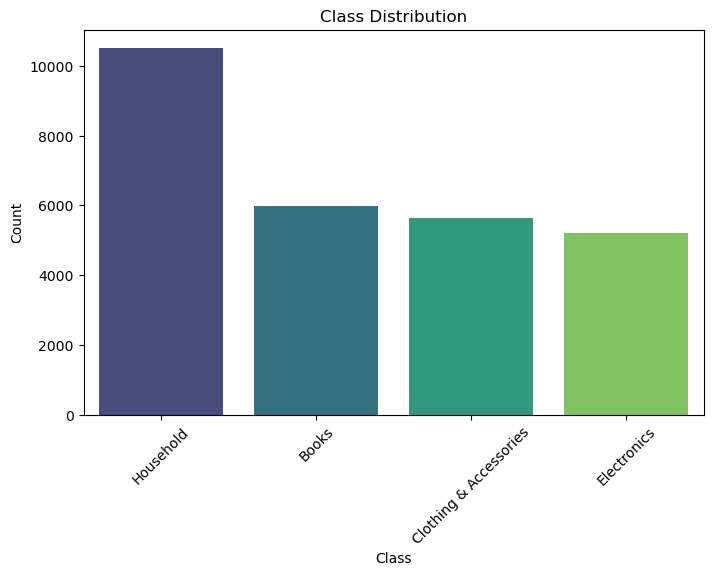

Class Distribution:
 Household                 10503
Books                      5968
Clothing & Accessories     5643
Electronics                5213
Name: class, dtype: int64


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each class
class_counts = df['class'].value_counts()

# Plot distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.show()

# Print counts
print("Class Distribution:\n", class_counts)

In [20]:
df

,class,text,cleaned_text
0,Clothing & Accessories,Ziya Pure Cotton Skirt Slip with Side-Slit Pac...,ziya pure cotton skirt slip side - slit pack 3...
1,Household,Servewell Pink Blossoms Round Buffet Plate Set...,servewell pink blossoms round buffet plate set 6.
2,Household,Sealing Machine Teflon & Metal Element Strip (...,seal machine teflon and metal element strip 8 ...
3,Household,STARVIN® Premium Fan Heater Heat Blow || Silen...,starvin premium fan heater heat blow silent fa...
4,Electronics,Sony DVD-R Media 100 Packs Create and store di...,sony dvd - r media 100 pack create store digit...
...,...,...,...
27797,Electronics,Seagate 1TB Backup Plus Slim (Silver) USB 3.0 ...,seagate 1 tb backup plus slim silver usb 3.0 e...
27798,Household,Amazon Brand - Solimo 500 ml Large Vegetable C...,amazon brand - solimo 500 ml large vegetable c...
27799,Books,The Interpretation of Dreams From AudioFile Fr...,interpretation dreams audiofile freud famous p...
27800,Clothing & Accessories,Letz Dezine ™ Printed Poly Cotton Set of four ...,letz dezine printed poly cotton set four mullt...


In [55]:
df = df.drop_duplicates(subset='cleaned_text', keep='first')

In [56]:
df

,class,text,cleaned_text,char_count,word_count
0,Clothing & Accessories,Ziya Pure Cotton Skirt Slip with Side-Slit Pac...,ziya pure cotton skirt slip side - slit pack 3...,705,124
1,Household,Servewell Pink Blossoms Round Buffet Plate Set...,servewell pink blossoms round buffet plate set 6.,49,8
2,Household,Sealing Machine Teflon & Metal Element Strip (...,seal machine teflon and metal element strip 8 ...,430,79
3,Household,STARVIN® Premium Fan Heater Heat Blow || Silen...,starvin premium fan heater heat blow silent ro...,301,57
4,Electronics,Sony DVD-R Media 100 Packs Create and store di...,sony dvd - r media 100 pack create store digit...,209,43
...,...,...,...,...,...
27797,Electronics,Seagate 1TB Backup Plus Slim (Silver) USB 3.0 ...,seagate 1 tb backup plus slim silver usb 3.0 e...,986,165
27798,Household,Amazon Brand - Solimo 500 ml Large Vegetable C...,amazon brand - solimo 500 ml large vegetable c...,501,84
27799,Books,The Interpretation of Dreams From AudioFile Fr...,interpretation dreams audiofile freud famous p...,594,83
27800,Clothing & Accessories,Letz Dezine ™ Printed Poly Cotton Set of four ...,letz dezine printed poly cotton set four mullt...,257,42


/tmp/ipykernel_817489/2861931453.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['char_count'] = df['cleaned_text'].apply(len)
/tmp/ipykernel_817489/2861931453.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['cleaned_text'].apply(lambda x: len(str(x).split()))


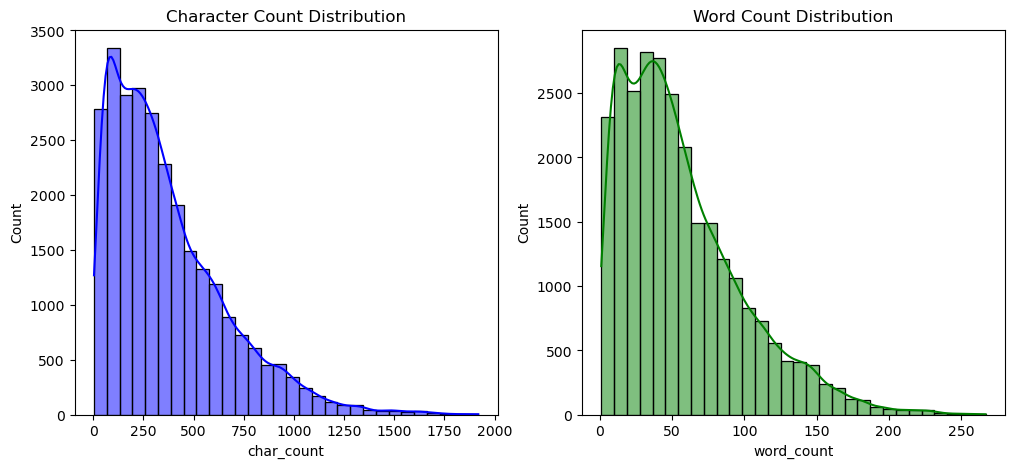

         char_count    word_count
count  27327.000000  27327.000000
mean     367.894500     56.364402
std      288.521488     41.979648
min        4.000000      1.000000
25%      148.000000     24.000000
50%      297.000000     47.000000
75%      517.000000     79.000000
max     1919.000000    267.000000


In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add text length columns
df['char_count'] = df['cleaned_text'].apply(len)
df['word_count'] = df['cleaned_text'].apply(lambda x: len(str(x).split()))

# Plot histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['char_count'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Character Count Distribution')

sns.histplot(df['word_count'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Word Count Distribution')

plt.show()

# Print statistics
print(df[['char_count', 'word_count']].describe())

In [64]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter

# Get the class distribution
class_counts = Counter(df['class'])
classes = np.unique(df['class'])

# Compute class weights
class_weights = compute_class_weight('balanced', classes=classes, y=df['class'])
class_weight_dict = dict(zip(classes, class_weights))

In [65]:
class_weight_dict

{'Books': 1.1447302278820375,
 'Clothing & Accessories': 1.2106592238171185,
 'Electronics': 1.3105217724918472,
 'Household': 0.6504570122822051}

In [69]:
import numpy as np

# Function to detect outliers using IQR
def detect_outliers(series):
    Q1 = np.percentile(series, 25)  # First quartile (25%)
    Q3 = np.percentile(series, 75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = max(0, Q1 - 1.5 * IQR)
    upper_bound = Q3 + 2.0 * IQR
    return lower_bound, upper_bound

# Compute outlier thresholds
char_lower, char_upper = detect_outliers(df['char_count'])
word_lower, word_upper = detect_outliers(df['word_count'])

# Identify outliers
char_outliers = df[(df['char_count'] < char_lower) | (df['char_count'] > char_upper)]
word_outliers = df[(df['word_count'] < word_lower) | (df['word_count'] > word_upper)]

# Print outlier statistics
print(f"Character Count Outliers: {char_outliers.shape[0]} out of {df.shape[0]} samples")
print(f"Word Count Outliers: {word_outliers.shape[0]} out of {df.shape[0]} samples")


Character Count Outliers: 317 out of 27327 samples
Word Count Outliers: 227 out of 27327 samples


In [70]:
word_upper

189.0

In [36]:
def filter_long_text(df, max_words=400):
    # Add a column for word count
    df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))

    # Filter out rows where word count exceeds max_words
    df_filtered = df[df['word_count'] <= max_words]
    
    return df_filtered

# Apply the function to your DataFrame
df = filter_long_text(df)

/tmp/ipykernel_817489/2871607833.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))


In [37]:
df

,class,text,cleaned_text,char_count,word_count
0,Clothing & Accessories,Ziya Pure Cotton Skirt Slip with Side-Slit Pac...,ziya pure cotton skirt slip side - slit pack 3...,705,124
1,Household,Servewell Pink Blossoms Round Buffet Plate Set...,servewell pink blossoms round buffet plate set 6.,49,8
2,Household,Sealing Machine Teflon & Metal Element Strip (...,seal machine teflon and metal element strip 8 ...,430,79
3,Household,STARVIN® Premium Fan Heater Heat Blow || Silen...,starvin premium fan heater heat blow silent fa...,301,57
4,Electronics,Sony DVD-R Media 100 Packs Create and store di...,sony dvd - r media 100 pack create store digit...,209,43
...,...,...,...,...,...
27797,Electronics,Seagate 1TB Backup Plus Slim (Silver) USB 3.0 ...,seagate 1 tb backup plus slim silver usb 3.0 e...,986,165
27798,Household,Amazon Brand - Solimo 500 ml Large Vegetable C...,amazon brand - solimo 500 ml large vegetable c...,501,84
27799,Books,The Interpretation of Dreams From AudioFile Fr...,interpretation dreams audiofile freud famous p...,594,83
27800,Clothing & Accessories,Letz Dezine ™ Printed Poly Cotton Set of four ...,letz dezine printed poly cotton set four mullt...,257,42


In [66]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split into Train (80%), Temp (20%)
train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    df["cleaned_text"], df["class"], test_size=0.2, random_state=42, stratify=df["class"], shuffle=True
)

# Split Temp (20%) into Validation (10%) and Test (10%)
val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts, temp_labels, test_size=0.5, random_state=42, stratify=temp_labels, shuffle=True
)

# Convert to DataFrames
train_df = pd.DataFrame({"text": train_texts, "label": train_labels})
val_df = pd.DataFrame({"text": val_texts, "label": val_labels})
test_df = pd.DataFrame({"text": test_texts, "label": test_labels})

# Save to CSV
train_df.to_csv("train_set_1.csv", index=False)
val_df.to_csv("val_set_1.csv", index=False)
test_df.to_csv("test_set_1.csv", index=False)

print("Train, validation, and test sets saved successfully with shuffling!")

Train, validation, and test sets saved successfully with shuffling!
